In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder


### model

#### helper functions

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def one_hot(y, num_classes):
    onehot = np.zeros((y.size, num_classes))
    onehot[np.arange(y.size), y] = 1
    return onehot


In [71]:
def logistic_regression(X,y,epochs=200,learning_rate=0.1):

    loss_history=[]
    num_classes = len(np.unique(y))
    num_features = X.shape[1]

    W = np.zeros((num_features, num_classes))
    b = np.zeros((1, num_classes))

    for epoch in range(epochs):
        # Forward pass
        z = np.dot(X, W) + b
        probs = softmax(z)
    
        # One-hot encode true labels
        y_onehot = one_hot(y, num_classes)
    
        # Compute loss (cross-entropy)
        loss = -np.mean(np.sum(y_onehot * np.log(probs + 1e-9), axis=1))
    
        # Backward pass (gradients)
        dW = np.dot(X.T, (probs - y_onehot)) / X.shape[0]
        db = np.sum(probs - y_onehot, axis=0, keepdims=True) / X.shape[0]
    
        # Update parameters
        W -= learning_rate * dW
        b -= learning_rate * db
    
        if epoch % 20 == 0 or epoch == epochs - 1:
            print(f"Epoch {epoch+1}/{epochs}, Loss = {loss:.4f}")

        loss_history.append(loss)    

    return W,b,loss_history        


#### prediction

In [83]:
def predict(X,W,b):
    z_test = np.dot(X, W) + b
    probs_test = softmax(z_test)
    y_pred = np.argmax(probs_test, axis=1)

    return y_pred

In [47]:
def evaluate(y_true, y_pred, name="Model"):
    accuracy = np.mean(y_true == y_pred)
    precision_list, recall_list, f1_list = [], [], []

    for c in np.unique(y_true):
        tp = np.sum((y_pred == c) & (y_true == c))
        fp = np.sum((y_pred == c) & (y_true != c))
        fn = np.sum((y_pred != c) & (y_true == c))

        precision = tp / (tp + fp + 1e-9)
        recall = tp / (tp + fn + 1e-9)
        f1 = 2 * precision * recall / (precision + recall + 1e-9)

        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)

    accuracy_score, precision_score, recall_score, f1_score = (
        accuracy,
        np.mean(precision_list),
        np.mean(recall_list),
        np.mean(f1_list),
    )

    return accuracy_score, precision_score, recall_score, f1_score

####  array to image

In [84]:
def to_image(A):
    A=A.to_numpy()
    img=A.reshape(28,28)
    return img

def plot_image(img,title):
    plt.imshow(img, cmap="gray")
    plt.title(f"Predicted {title}")
    plt.axis("off")
    plt.show()


# implementation

In [6]:
train=pd.read_csv(r"F:/collage/Machine-learning/Lab-10/MNIST_data/train.csv")
test=pd.read_csv(r"F:/collage/Machine-learning/Lab-10/MNIST_data/test.csv")

In [10]:
print("Train data ",train.shape,"\ntest data",test.shape)

Train data  (42000, 785) 
test data (28000, 784)


In [73]:
y=train["label"].values
X=train.drop("label",axis=1).values

In [74]:
np.random.seed(42)
indices = np.random.permutation(len(X))
split = int(0.8 * len(X))

train_idx, val_idx = indices[:split], indices[split:]
X_train, X_val = X[train_idx], X[val_idx]
y_train, y_val = y[train_idx], y[val_idx]

In [76]:
print(X_train.shape, X_val.shape,y_train.shape, y_val.shape)

(33600, 784) (8400, 784) (33600,) (8400,)


In [78]:
W,b,loss_history= logistic_regression(X_train,y_train)

Epoch 1/200, Loss = 2.3026
Epoch 21/200, Loss = 3.1481
Epoch 41/200, Loss = 3.9860
Epoch 61/200, Loss = 2.0431
Epoch 81/200, Loss = 5.4315
Epoch 101/200, Loss = 2.2593
Epoch 121/200, Loss = 4.2223
Epoch 141/200, Loss = 1.8135
Epoch 161/200, Loss = 5.6622
Epoch 181/200, Loss = 2.0732
Epoch 200/200, Loss = 1.8010


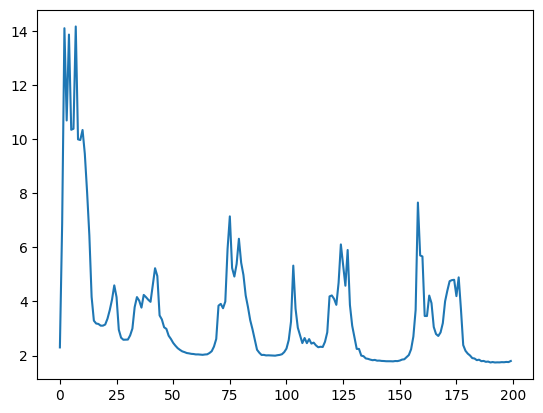

In [81]:
plt.plot(loss_history)

In [ ]:
accuracy, precision, recall, f1 =evaluate(y_val,predict(X_val,W,b))

In [ ]:
print("\n📊 Final Test Set Performance")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")


📊 Final Test Set Performance
Accuracy:  0.9042
Precision: 0.9063
Recall:    0.9027
F1 Score:  0.9028


In [90]:
def predition_for_test(X,W,b):
    y=predict(X,W,b)
    img=to_image(X)

    return img


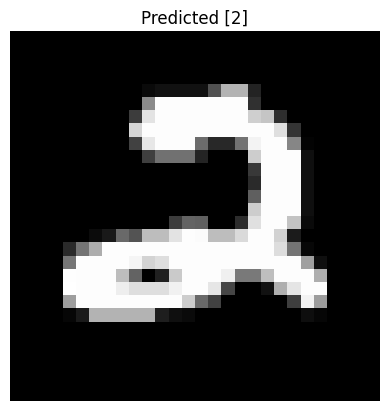

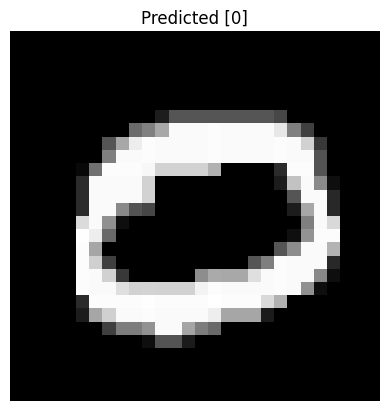

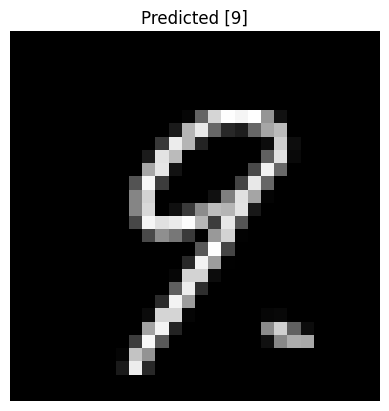

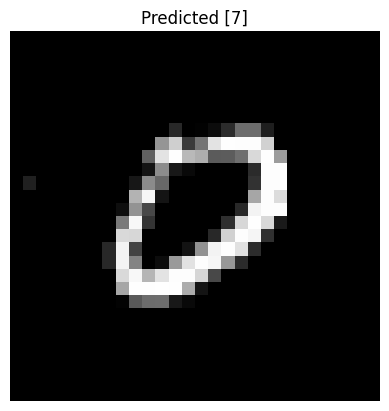

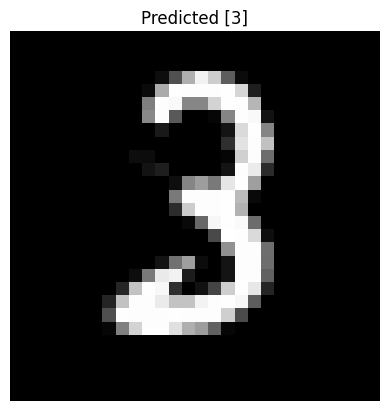

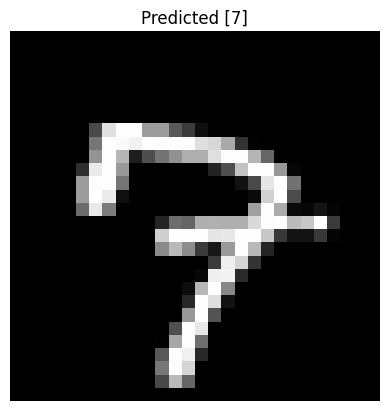

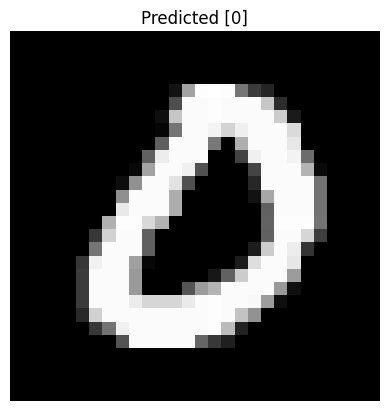

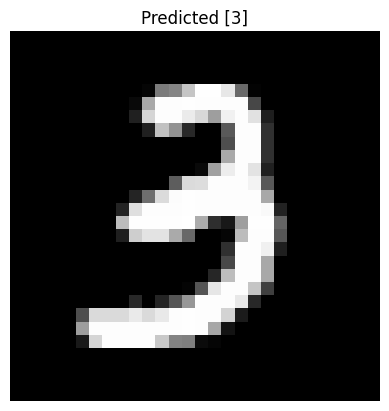

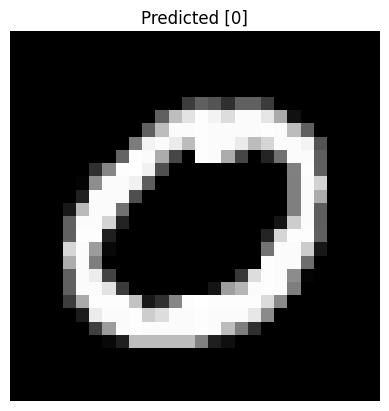

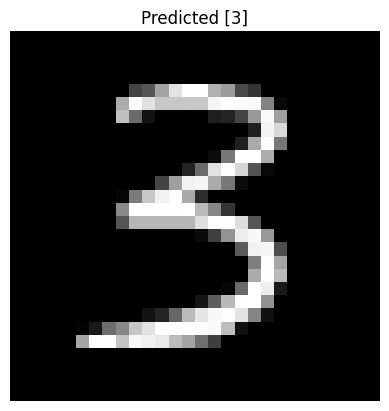

In [89]:
for i in range(0,10):
    y=predict(test.iloc[i],W,b)
    plot_image(to_image(test.iloc[i]),y)